In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 100)
%matplotlib inline

In [5]:
df_train_raw = pd.read_csv('../input/train.csv')
df_test_raw = pd.read_csv('../input/test.csv')
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()
train_len = len(df_train)

In [3]:
df_train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [4]:
df_test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
5,6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
6,7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
7,8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
8,9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown
9,10,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure


In [5]:
df_train.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
mean,13564,40,1355,15,260,2,40,0,0
std,7831,10,3003,8,260,3,100,2,0
min,1,18,-6847,1,0,1,-1,0,0
25%,6782,33,72,8,104,1,-1,0,0
50%,13564,39,449,16,182,2,-1,0,0
75%,20346,48,1428,21,323,3,-1,0,0
max,27128,95,102127,31,4918,63,871,275,1


In [6]:
df_test.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous
count,18083,18083,18083,18083,18083,18083,18083,18083
mean,9042,40,1371,15,254,2,39,0
std,5220,10,3105,8,253,3,99,1
min,1,18,-8019,1,0,1,-1,0
25%,4521,33,72,8,102,1,-1,0
50%,9042,39,447,16,178,2,-1,0
75%,13562,48,1427,21,314,3,-1,0
max,18083,95,98417,31,3881,50,854,58


In [7]:
df_train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df_test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

欠損値なし

### プロット用関数

In [40]:
def plot_dist_num(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(10,5))
    plt.hist(plot_data[col_name], bins=20)
    plt.title(col_name)
    plt.show()

In [41]:
def plot_dist_obj(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(10,5))
    #data[col_name].value_counts().plot(kind='bar')
    sns.countplot(plot_data[col_name])
    plt.title(col_name)
    plt.show()

In [11]:
def plot_dist(data):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_dist_num(data, col_name)
    
    for col_name in obj_cols:
        plot_dist_obj(data, col_name)

In [12]:
def plot_vs_num(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    col_bin = pd.cut(plot_data[col_name], bins=10)
    sns.barplot(x=col_bin, y=plot_data[y_name])
    plt.ylabel(y_name)
    plt.title(col_name + '_bin')
    plt.show()

In [13]:
def plot_vs_obj(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    sns.barplot(data = plot_data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

In [14]:
def plot_vs(data, y_name):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_vs_num(data, col_name, y_name)
    
    for col_name in obj_cols:
        plot_vs_obj(data, col_name, y_name)

In [15]:
def plot_box(data, col_name):
    plt.figure(figsize=(15,3))
    sns.boxplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [16]:
def plot_violin(data, col_name):
    plt.figure(figsize=(15,3))
    sns.violinplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [17]:
train_num_cols = df_train.select_dtypes(include='number').columns
train_obj_cols = df_train.select_dtypes(exclude='number').columns

## まとめてプロット

#### y vs. 連続データ (violinplot)

#### y vs. 連続データ (boxplot)

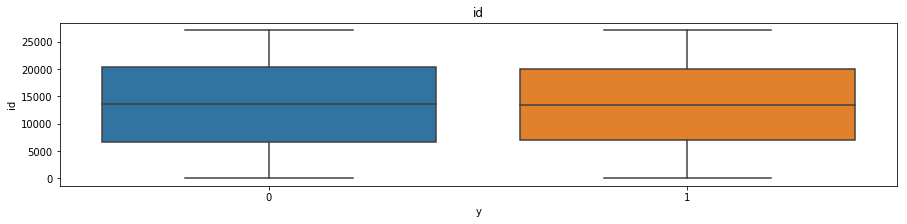

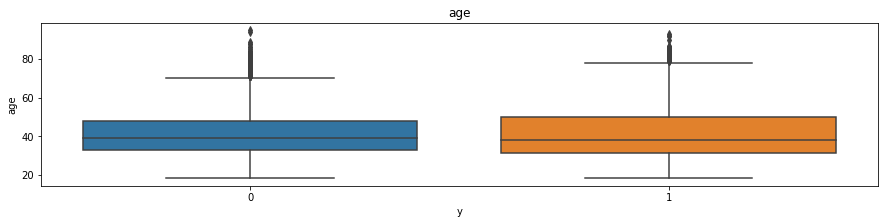

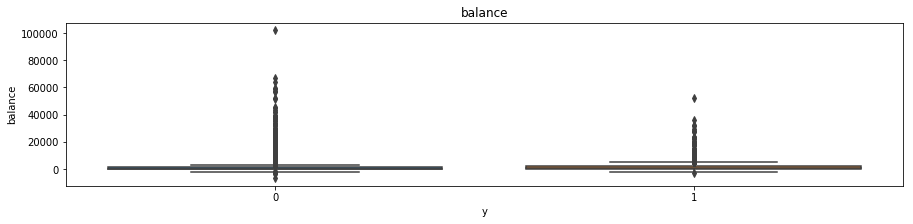

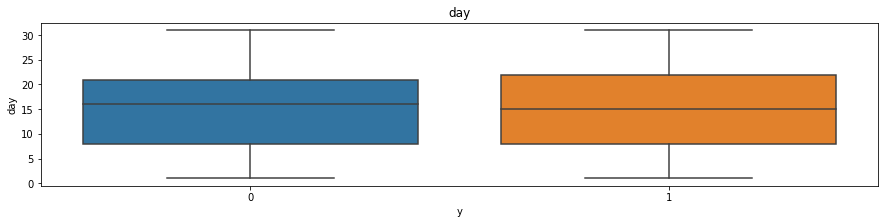

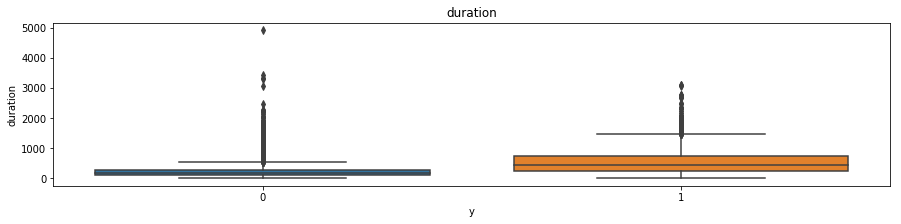

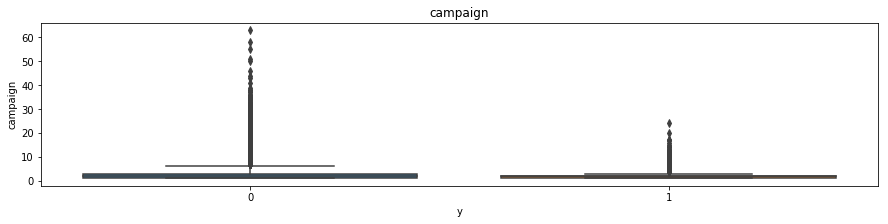

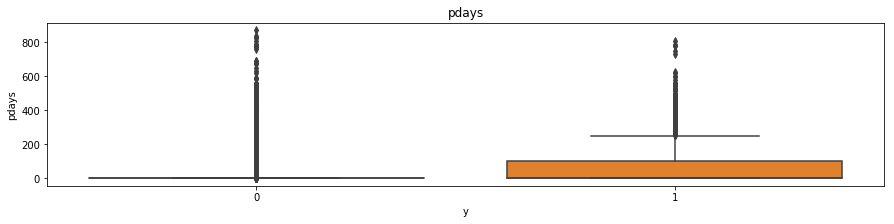

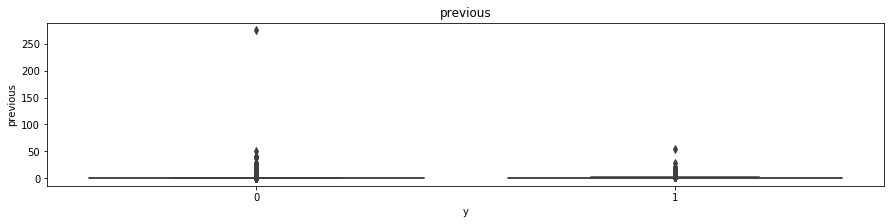

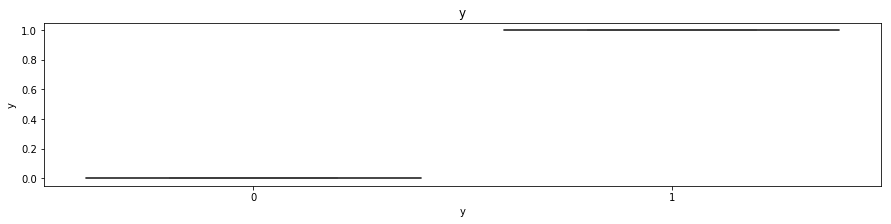

In [18]:
for col_name in train_num_cols:
    plot_box(df_train, col_name)

In [19]:
df_train[df_train.balance>80000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16312,16313,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,0


In [20]:
df_train[df_train.duration>4000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9236,9237,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0


In [21]:
df_train[df_train.previous>100]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3140,3141,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


## 外れ値削除後

In [65]:
df_out = pd.read_csv('./trian_without_outliers.csv')

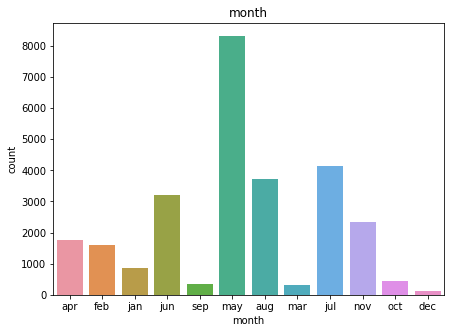

In [66]:
plot_dist_obj(df_out, 'month')

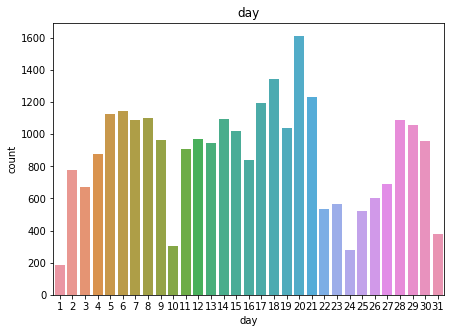

In [67]:
plot_dist_obj(df_out, 'day')

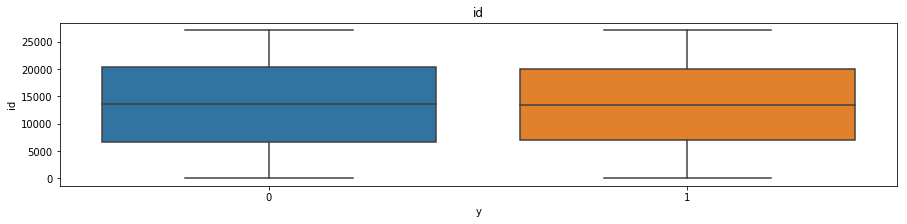

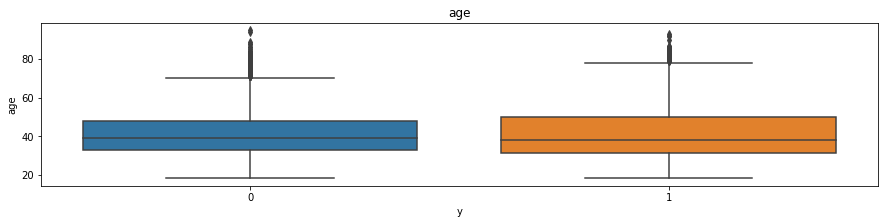

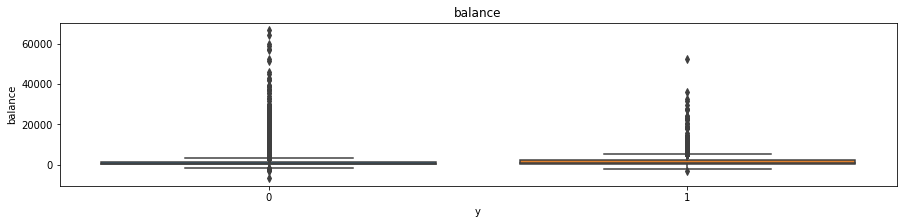

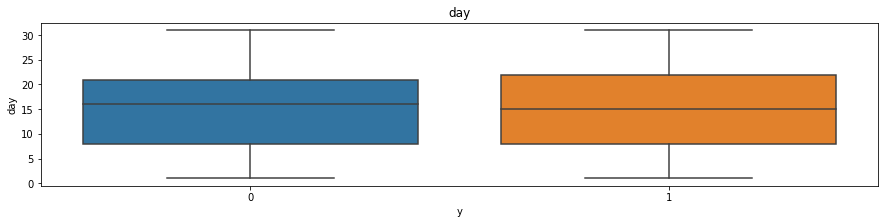

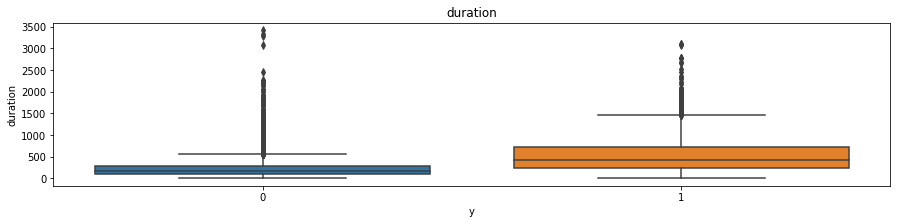

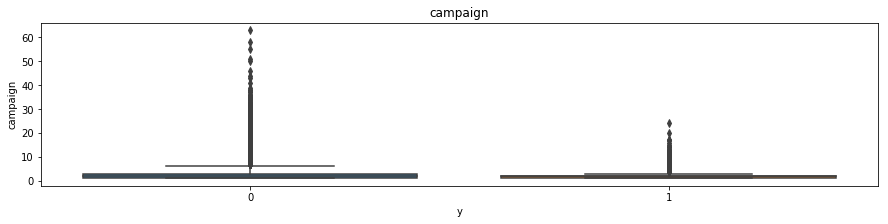

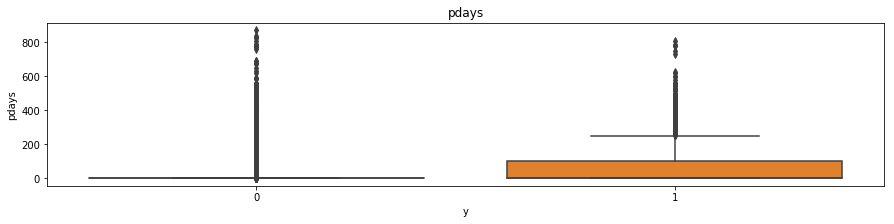

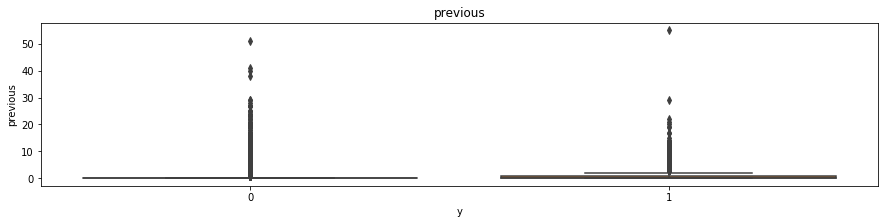

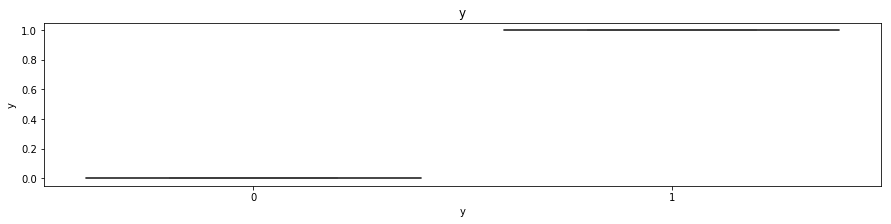

In [23]:
for col_name in train_num_cols:
    plot_box(df_out, col_name)

In [24]:
df_out[(df_out.job=='student') & (df_out.age>35)]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1616,1617,40,student,married,secondary,no,260,no,no,cellular,19,nov,52,1,152,6,failure,0
4281,4283,36,student,single,secondary,no,904,no,no,unknown,20,jun,10,8,-1,0,unknown,0
4316,4318,40,student,married,secondary,no,260,no,no,unknown,20,jun,197,6,-1,0,unknown,0
4357,4359,38,student,single,tertiary,no,3316,no,no,unknown,17,jun,1345,3,-1,0,unknown,1
4363,4365,38,student,married,secondary,no,140,no,no,cellular,28,aug,12,21,-1,0,unknown,0
4926,4928,40,student,single,secondary,no,5349,no,no,unknown,6,jun,471,1,-1,0,unknown,0
5543,5545,36,student,single,secondary,no,17,no,no,cellular,22,apr,621,1,-1,0,unknown,1
6403,6405,40,student,single,secondary,no,595,yes,no,cellular,3,jun,406,2,-1,0,unknown,1
8339,8341,41,student,married,secondary,no,1309,no,no,unknown,20,jun,28,4,-1,0,unknown,0
9147,9149,37,student,married,unknown,no,0,no,no,unknown,18,jun,115,1,-1,0,unknown,0


In [25]:
df_out[(df_out.pdays==-1) & (df_out.poutcome!='unknown')]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


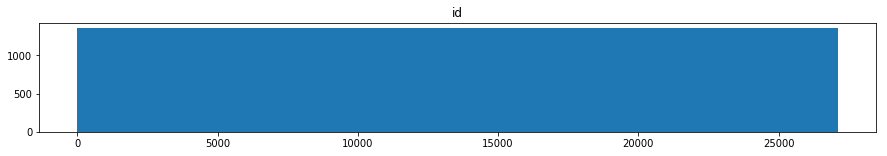

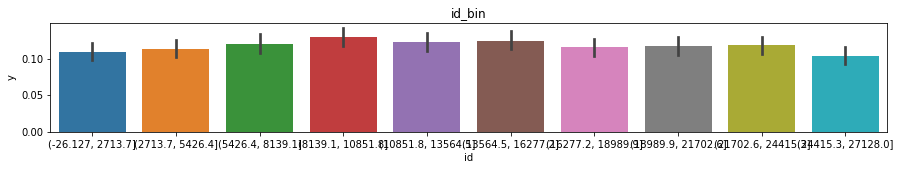

-----------------------------------------------------------


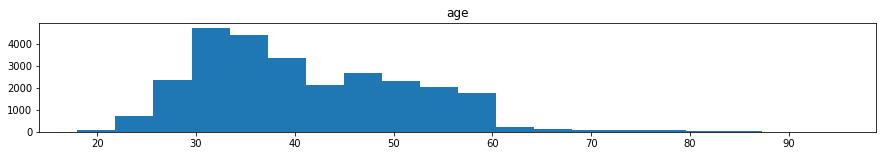

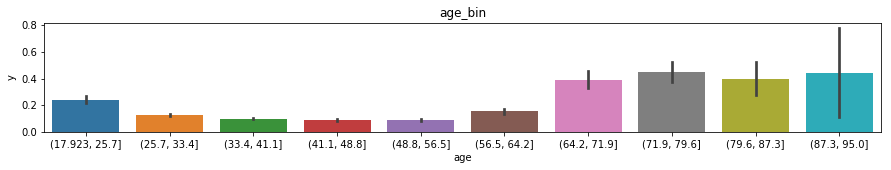

-----------------------------------------------------------


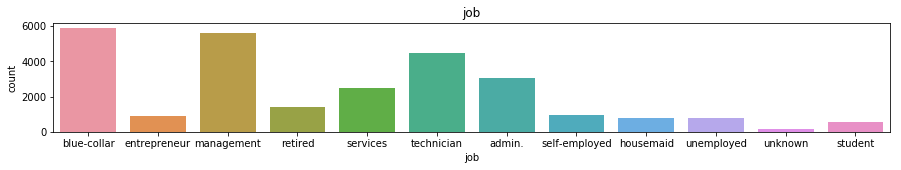

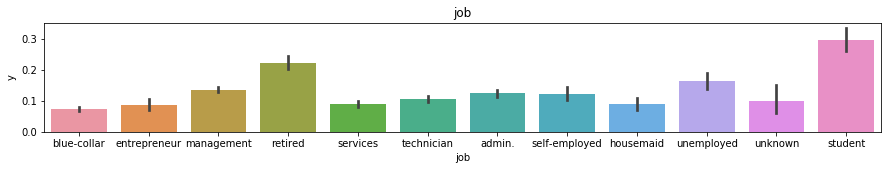

-----------------------------------------------------------


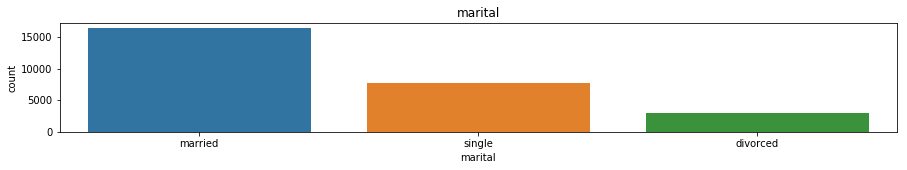

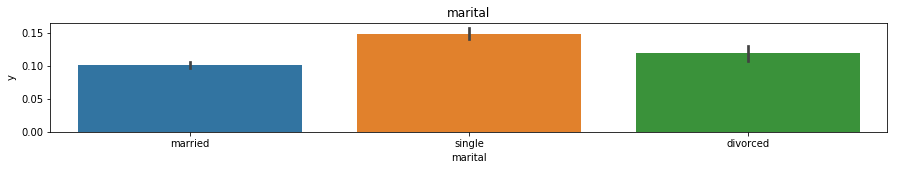

-----------------------------------------------------------


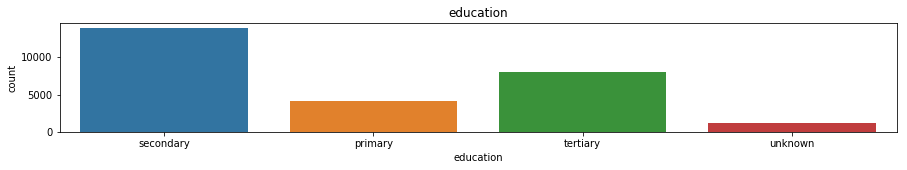

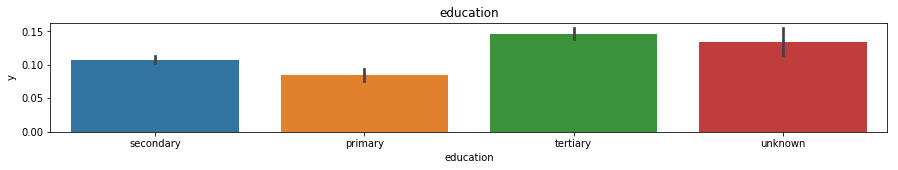

-----------------------------------------------------------


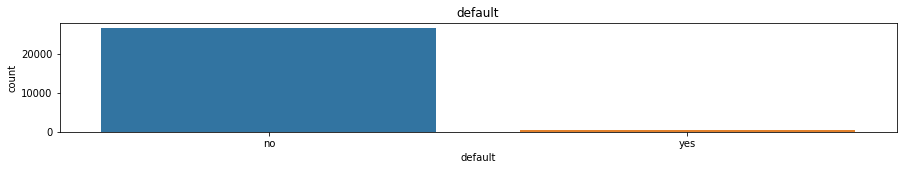

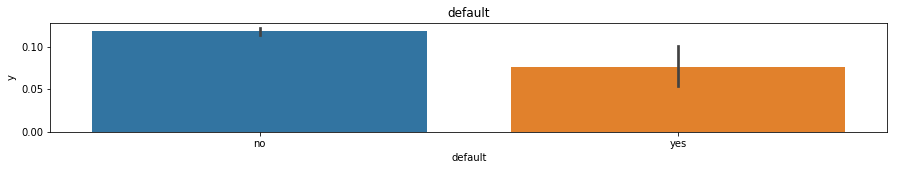

-----------------------------------------------------------


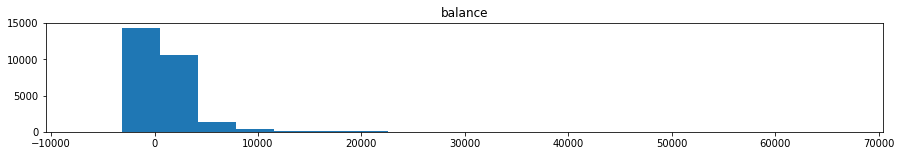

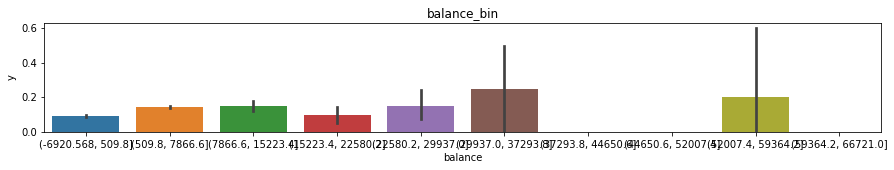

-----------------------------------------------------------


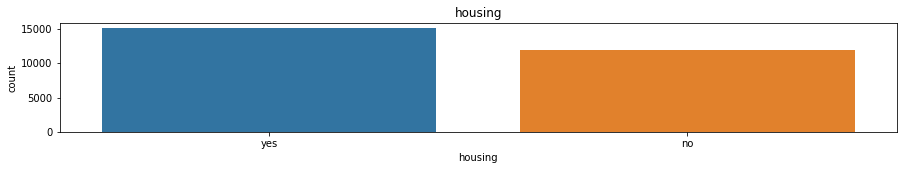

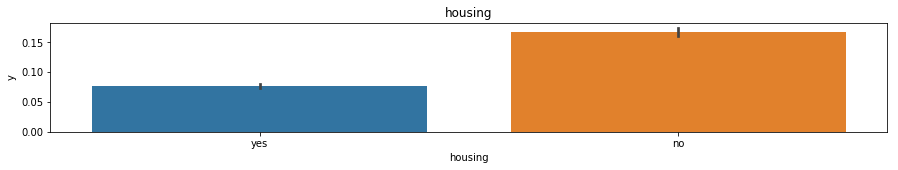

-----------------------------------------------------------


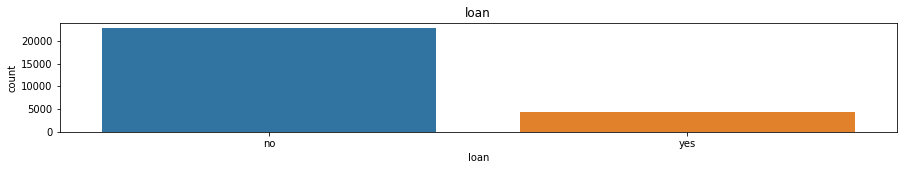

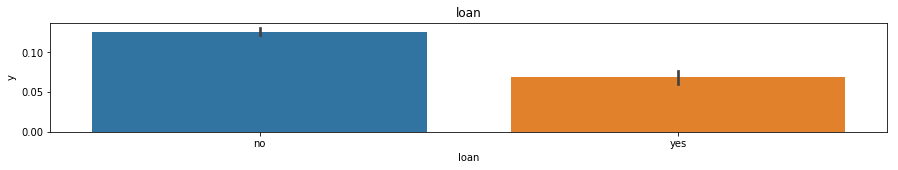

-----------------------------------------------------------


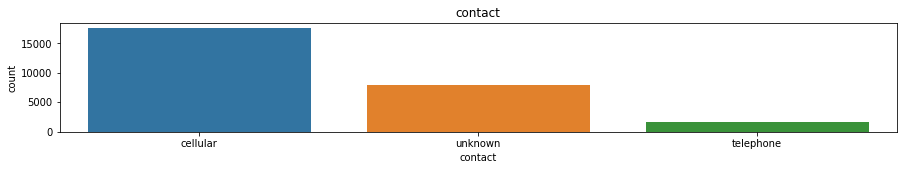

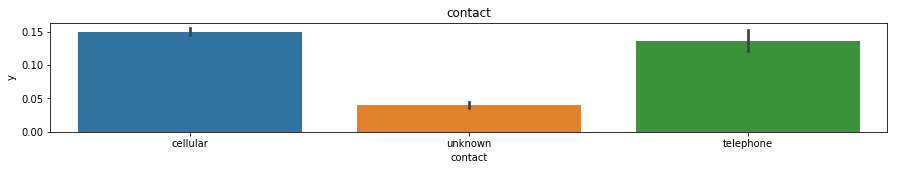

-----------------------------------------------------------


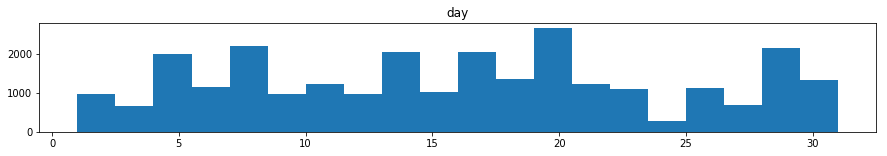

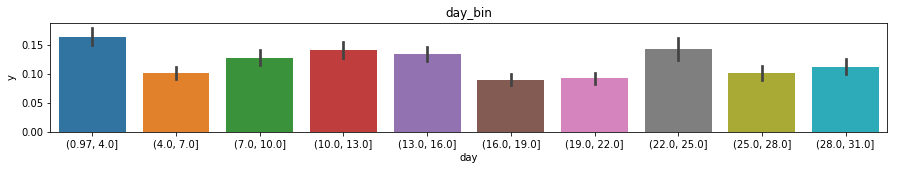

-----------------------------------------------------------


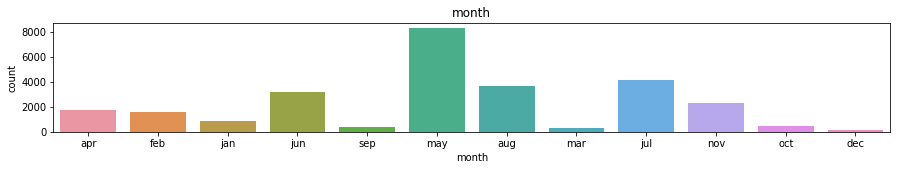

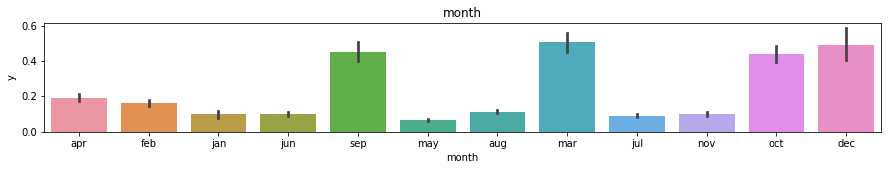

-----------------------------------------------------------


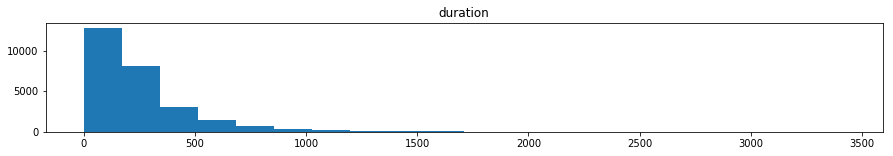

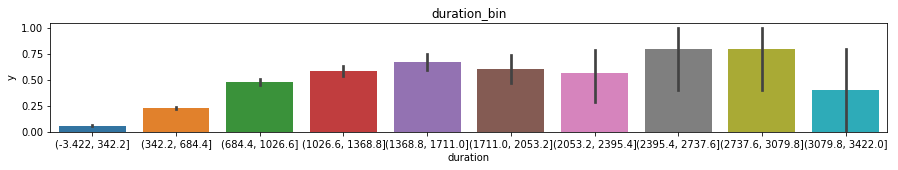

-----------------------------------------------------------


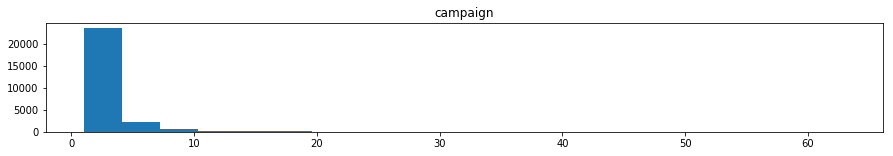

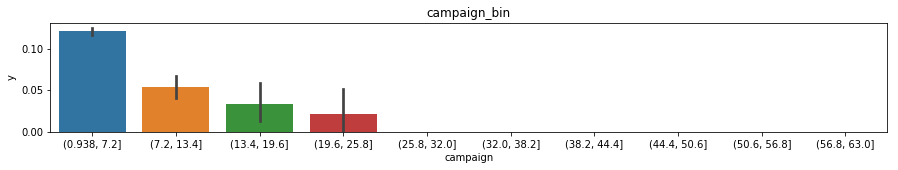

-----------------------------------------------------------


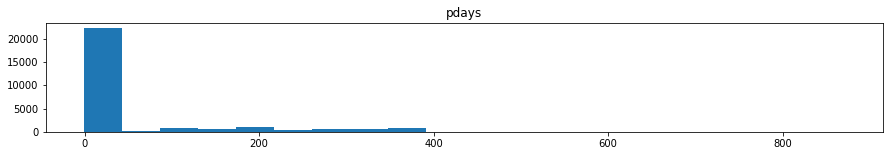

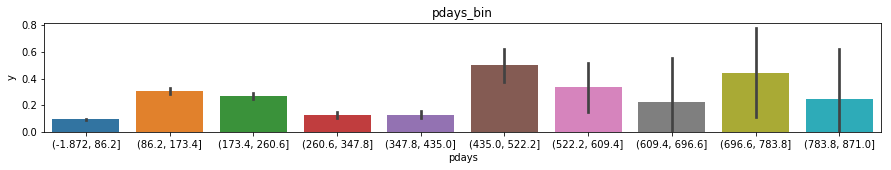

-----------------------------------------------------------


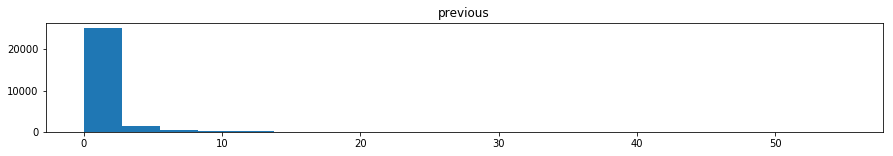

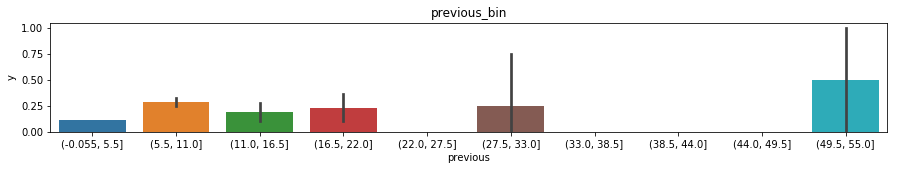

-----------------------------------------------------------


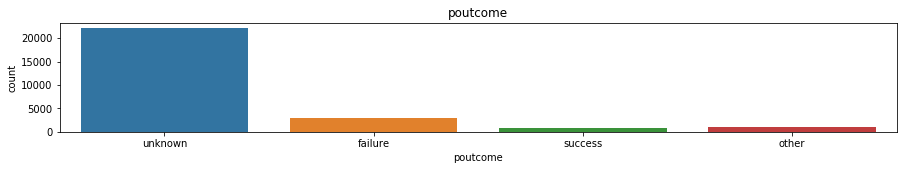

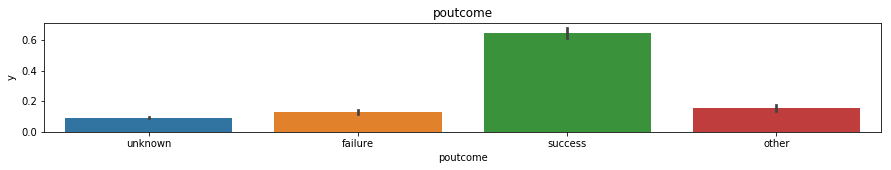

-----------------------------------------------------------


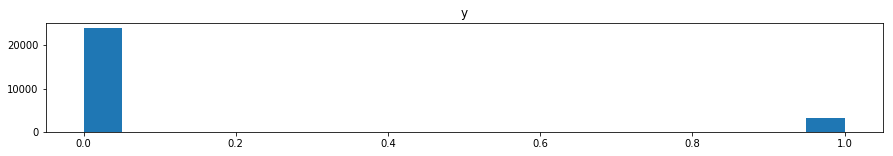

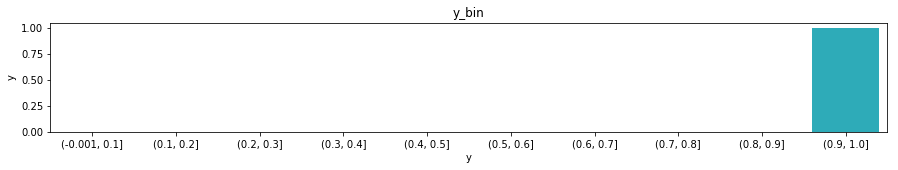

-----------------------------------------------------------


In [26]:
df_plot = df_out
for col_name in df_plot.columns:
    dtype = df_plot[col_name].dtype
    if (dtype == 'object'):
        plot_dist_obj(df_plot, col_name)
        plot_vs_obj(df_plot, col_name, 'y')
        print('-----------------------------------------------------------')
    else:
        plot_dist_num(df_plot, col_name)
        plot_vs_num(df_plot, col_name, 'y')
        print('-----------------------------------------------------------')

In [27]:
df_new = pd.read_csv('./df_with_nan.csv')

In [32]:
df_new.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_log,age_log_std,balance_p_nan,balance_m_nan,balance_p_log_nan,balance_m_log_nan,balance_p_log_std_nan,balance_m_log_std_nan,balance_sign,date,week,duration_log,duration_log_std,duration_log_std_cut,y_mean_by_duration_log,duration_inv,campaign_log,pdays_nan,pdays_log_nan,pdays_log_std_nan,previous_nan,previous_log_nan,freq,total_touch,previous_date_nan,education_num
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,4,939,1,1000,0,unknown,1.0,3.663562,-0.062289,1756.0,NaN,7.470794,NaN,0.674389,NaN,1,93,2,6.845880,1.816367,"(1.562, 2.458]",0.538635,0.001064,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1,NaN,2
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,2,172,10,1000,0,unknown,1.0,3.931826,0.991491,1443.0,NaN,7.274480,NaN,0.559045,NaN,1,49,0,5.153292,-0.020013,"(-0.231, 0.665]",0.094252,0.005780,2.302585,NaN,NaN,NaN,NaN,NaN,10.000000,10,NaN,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,4,567,1,595,2,failure,1.0,3.583519,-0.376709,436.0,NaN,6.077642,NaN,-0.144157,NaN,1,103,5,6.342121,1.269812,"(0.665, 1.562]",0.233648,0.001761,0.000000,595.0,6.388561,1.549501,2.0,0.693147,1.003361,3,-492.0,3
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,1,423,1,1000,0,unknown,1.0,4.143135,1.821543,474.0,NaN,6.161207,NaN,-0.095058,NaN,1,25,4,6.049733,0.952585,"(0.665, 1.562]",0.233648,0.002358,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1,NaN,2
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,4,502,1,9,2,success,1.0,3.433987,-0.964091,354.0,NaN,5.869297,NaN,-0.266570,NaN,1,120,1,6.220590,1.137957,"(0.665, 1.562]",0.233648,0.001988,0.000000,9.0,2.197225,-4.050458,2.0,0.693147,1.222222,3,111.0,3


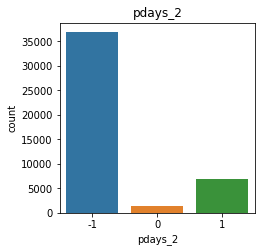

In [29]:
plot_dist_obj(df_new, 'pdays_2')

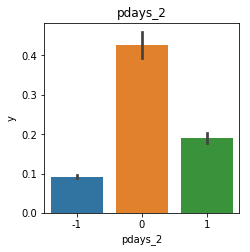

In [31]:
plot_vs_obj(df_new, 'pdays_2', 'y')

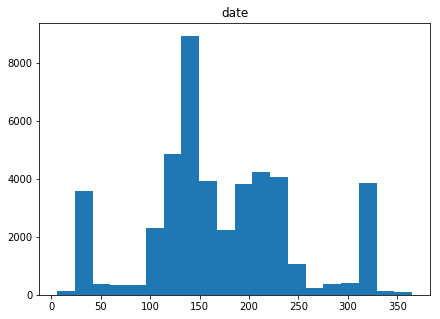

In [53]:
plot_dist_num(df_new, 'date')

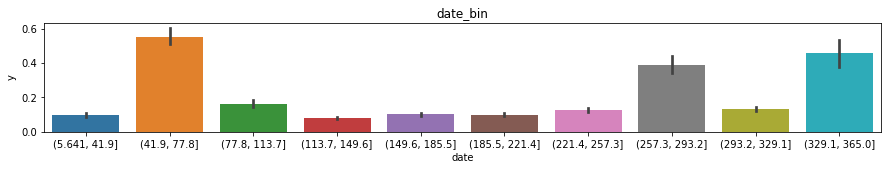

In [68]:
plot_vs_num(df_new, 'date', 'y')

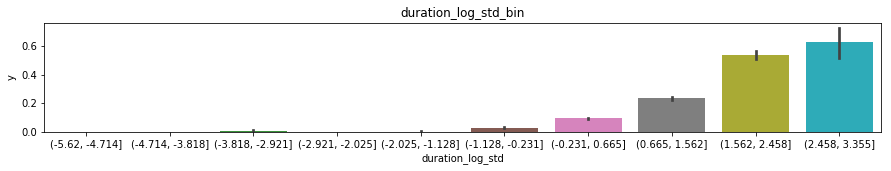

In [54]:
plot_vs_num(df_new, 'duration_log_std', 'y')

In [16]:
size = (3.5,3.5)

In [17]:
def plot_dist_num(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=size)
    plt.hist(plot_data[col_name], bins=20)
    plt.title(col_name)
    plt.show()

In [18]:
def plot_dist_obj(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=size)
    #data[col_name].value_counts().plot(kind='bar')
    sns.countplot(plot_data[col_name])
    plt.title(col_name)
    plt.show()

In [19]:
def plot_vs_num(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=size)
    col_bin = pd.cut(plot_data[col_name], bins=10)
    sns.barplot(x=col_bin, y=plot_data[y_name])
    plt.ylabel(y_name)
    plt.title(col_name + '_bin')
    plt.show()

In [20]:
def plot_vs_obj(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=size)
    sns.barplot(data = plot_data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

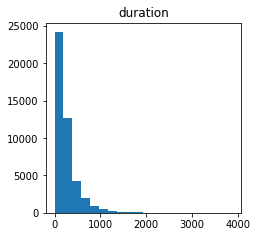

In [21]:
plot_dist_num(df_new, 'duration')

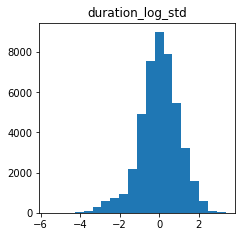

In [22]:
plot_dist_num(df_new, 'duration_log_std')

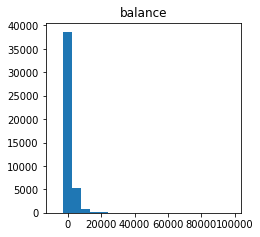

In [23]:
plot_dist_num(df_new, 'balance')

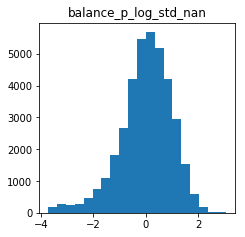

In [24]:
plot_dist_num(df_new, 'balance_p_log_std_nan')

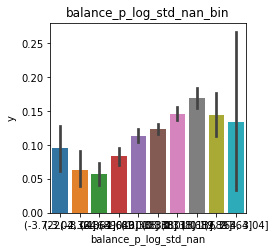

In [25]:
plot_vs_num(df_new, 'balance_p_log_std_nan', 'y')

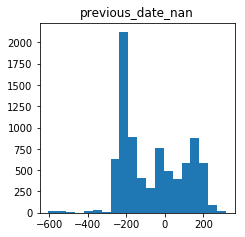

In [26]:
plot_dist_num(df_new, 'previous_date_nan')

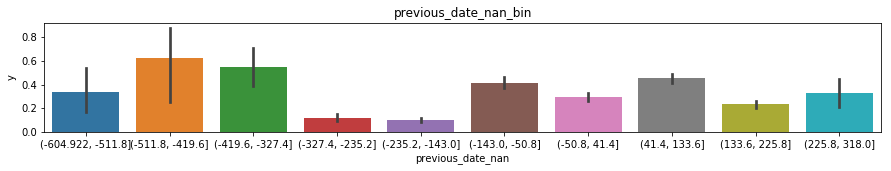

In [77]:
plot_vs_num(df_new, 'previous_date_nan', 'y')

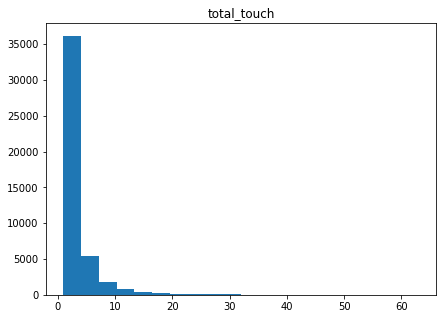

In [61]:
plot_dist_num(df_new, 'total_touch')

In [91]:
def plot_vs_obj(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(3.5,3.5))
    sns.barplot(data = plot_data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylim([0,1])
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

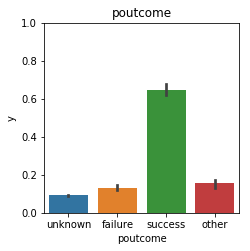

In [92]:
plot_vs_obj(df_new, 'poutcome', 'y')

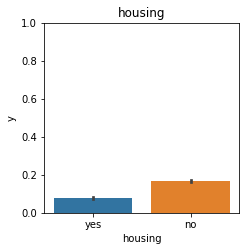

In [93]:
plot_vs_obj(df_new, 'housing', 'y')

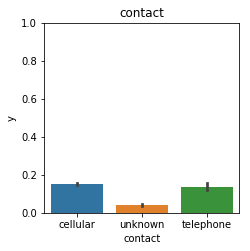

In [94]:
plot_vs_obj(df_new, 'contact', 'y')

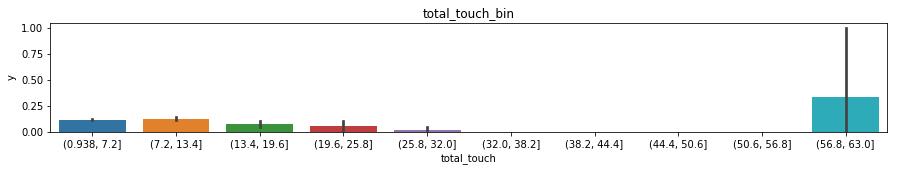

In [64]:
plot_vs_num(df_new, 'total_touch', 'y')

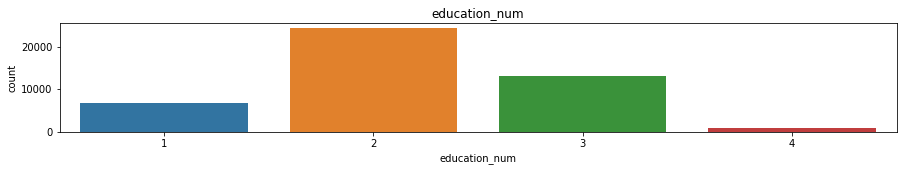

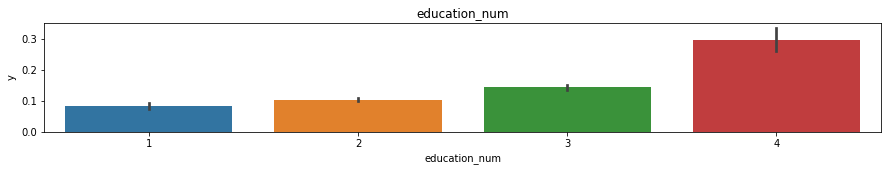

In [48]:
plot_dist_obj(df_new, 'education_num')
plot_vs_obj(df_new, 'education_num', 'y')

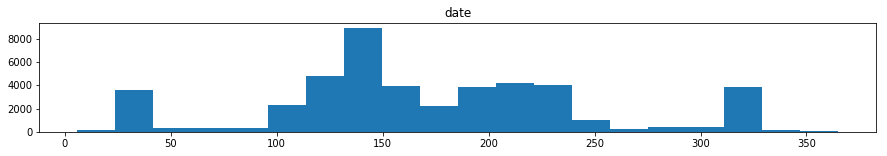

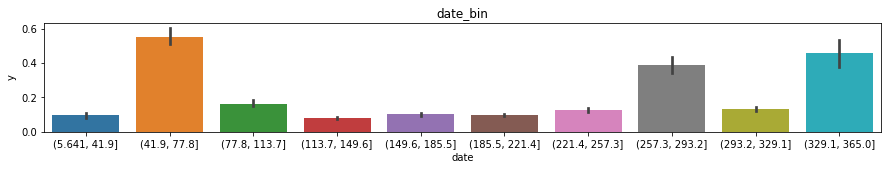

In [28]:
col_name = 'date'
plot_dist_num(df_new, col_name)
plot_vs_num(df_new, col_name, 'y')

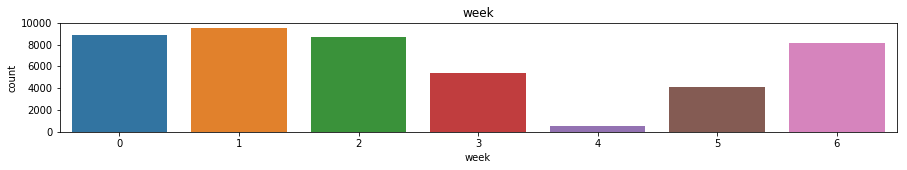

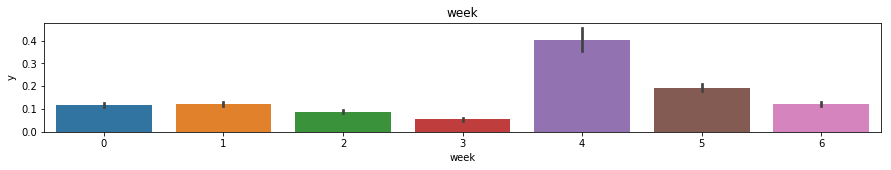

In [29]:
col_name = 'week'
plot_dist_obj(df_new, col_name)
plot_vs_obj(df_new, col_name, 'y')

In [32]:
df_new.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'age_log', 'age_log_std',
       'balance_p_nan', 'balance_m_nan', 'balance_p_log_nan',
       'balance_m_log_nan', 'balance_p_log_std_nan', 'balance_m_log_std_nan',
       'balance_sign', 'date', 'week', 'duration_log', 'duration_log_std',
       'duration_inv', 'campaign_log', 'pdays_nan', 'pdays_log_nan',
       'pdays_log_std_nan', 'previous_nan', 'previous_log_nan', 'freq',
       'total_touch', 'previous_date_nan'],
      dtype='object')

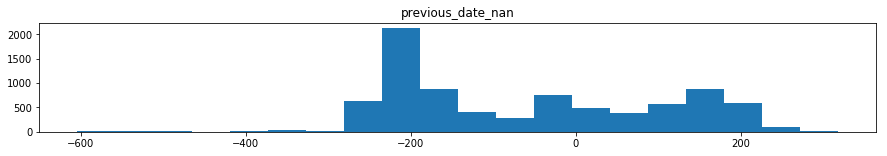

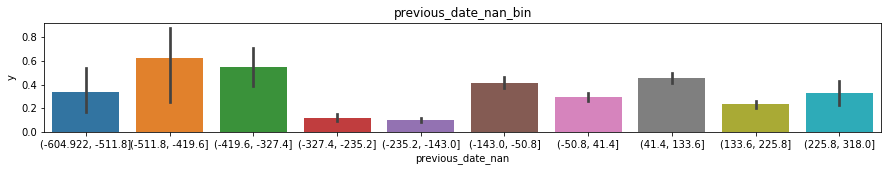

In [33]:
plot_dist_num(df_new, 'previous_date_nan')
plot_vs_num(df_new, 'previous_date_nan', 'y')

In [36]:
df_new = pd.read_csv('./df_with_nan.csv')